<a href="https://colab.research.google.com/github/jeewaka-p/SE4050-DL-Lecture02/blob/main/Seaborn_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pandas for managing datasets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
exp_array = np.random.exponential(scale=1.0, size=(4,4))
print(exp_array)

[[1.15918244 0.3633798  0.04214184 0.48870282]
 [0.06867602 0.0175565  1.88838794 1.80071097]
 [0.12292812 0.75226504 1.11909578 0.35628673]
 [1.00888681 1.4039762  0.34789567 0.55470523]]


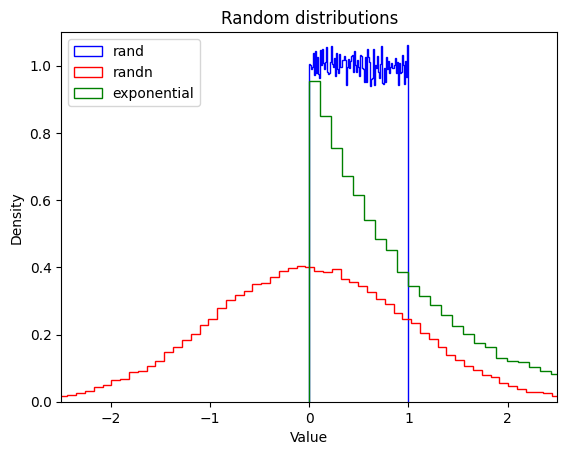

In [5]:
plt.hist(np.random.rand(100000), density=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), density=True, bins=100, histtype="step", color="red", label="randn")
plt.hist(np.random.exponential(scale=1.0, size=(100000)), density=True, bins=100, histtype="step", color="green", label="exponential")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

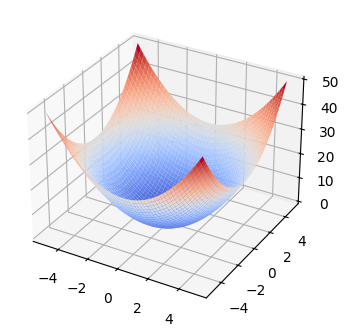

In [6]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = (X**2 + Y**2)

figure = plt.figure(1, figsize = (12, 4))
subplot3d = plt.subplot(111, projection='3d')
surface = subplot3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0.1)
plt.show()

In [7]:
!wget -q https://elitedatascience.com/wp-content/uploads/2022/07/Pokemon.csv
# Read dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

In [8]:

# Display first 5 observations
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Scatter Plot

<Axes: >

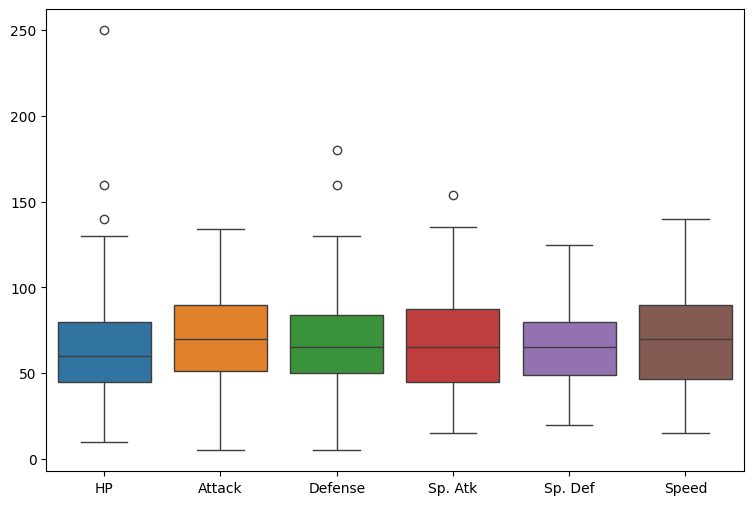

In [11]:

# Preprocess DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary', 'Name', 'Type 1', 'Type 2'], axis=1)

# New boxplot using stats_df
plt.figure(figsize=(9,6)) # Set plot dimensions
sns.boxplot(data=stats_df)

Violin Plot

Heat Map

In [13]:
# Calculate correlations
corr = stats_df.corr()

corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


<Axes: >

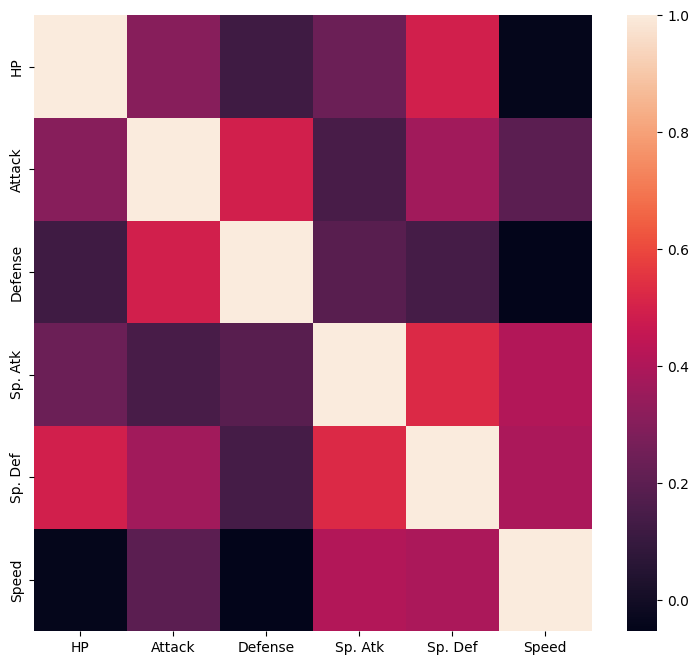

In [14]:
# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

https://elitedatascience.com/python-seaborn-tutorial#step-10

In [15]:
pearson_coef = stats_df.corr(method='pearson')
pearson_coef

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939
Attack,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701
Defense,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252
Sp. Atk,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516
Sp. Def,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656
Speed,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000


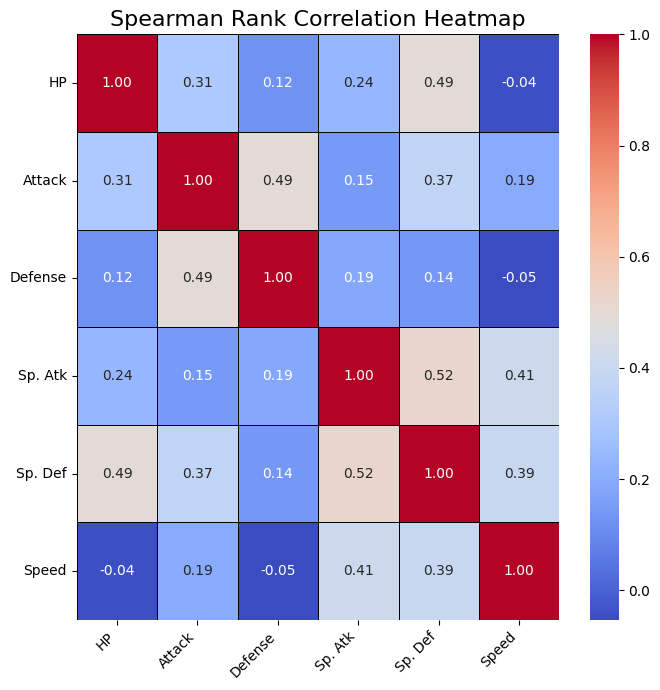

In [16]:
plt.figure(figsize=(7, 7))
sns.heatmap(pearson_coef, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Spearman Rank Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

In [17]:
spearman_corr = stats_df.corr(method='spearman')
spearman_corr


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.539356,0.390014,0.363993,0.566837,0.054014
Attack,0.539356,1.000000,0.541506,0.161862,0.386198,0.226590
Defense,0.390014,0.541506,1.000000,0.258751,0.250028,-0.033235
Sp. Atk,0.363993,0.161862,0.258751,1.000000,0.561665,0.384759
Sp. Def,0.566837,0.386198,0.250028,0.561665,1.000000,0.403588
Speed,0.054014,0.226590,-0.033235,0.384759,0.403588,1.000000


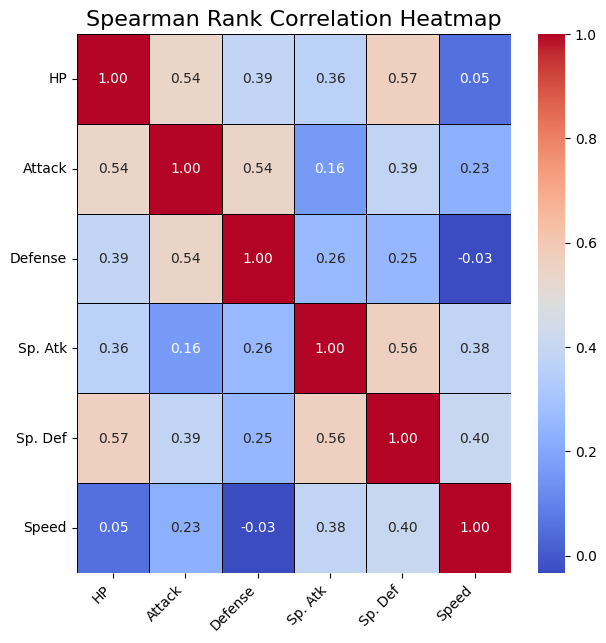

In [18]:
plt.figure(figsize=(7,7))
sns.heatmap(spearman_corr, annot=True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Spearman Rank Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()
